## Домашнее задание 3. Классификация имен. 
###### Выполнили: 
* _Осина Анна_ ИАД-2
* _Пляскин Павел_  ИАД-2

Для данного задания был взят датасет https://www.dropbox.com/s/otnidq7fvly8hwp/hw3_data.zip?dl=0, который состоит из 

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import brewer2mpl
dark2_colors = brewer2mpl.get_map('Paired', 'Qualitative', 8).mpl_colors

C:\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def get_data (collection_name):
    texts = ''
    directory = 'hw3_data/'+collection_name+'/'
    files = os.listdir(directory) 
    for f in files:
        file = open(directory+f, 'r', encoding = 'utf-8')
        texts += file.read()
    return texts.split()

In [3]:
female = get_data('female')
male = get_data('male')

print ('Всего имен: {}'.format(len(male) + len(female)))

Всего имен: 7947


##### Проверим наличие имен, которые могут быть и мужские, и женские. Удалим данные имена. Создадим общий список

In [4]:
def check_function(list_f, list_m):
    s_f = set(list_f)
    s_m = set(list_m)
    names = s_f.symmetric_difference(s_m) 
    print('Удалено {} неоднозначных имен'.format(len(list_f)+len(list_m)-len(names)))
    print ('Осталось имен: {}'.format(len(names)))
    return sorted(names) 

In [5]:
names = check_function(female, male)

Удалено 736 неоднозначных имен
Осталось имен: 7211


In [6]:
df_names = pd.DataFrame(names, columns = ['Name'])
df_names['Sex'] = 1
df_names.loc[df_names['Name'].isin(female), 'Sex'] = 0

Немного визуализации:

In [7]:
def alphabet():
    alphabet = []
    for i in range(65, 91):        
        alphabet.append(chr(i))        
    return alphabet      

In [8]:
alf = alphabet()
names_dict = {n:n[0] for n in names}

In [9]:
def plt_barchart (female, male):
    s_f = set(female)
    s_m = set(male)
    together = len(female)+len(male)
    names = s_f.symmetric_difference(s_m)
    deleted = len(female)+len(male)-len(names)
    y = [len(female), len(male), together, deleted, len(names)]
    x = range(len(y))
    plt.figure(figsize=(11,8))
    width = 1/1.5
    
    
    plt.bar(x, y, width, color = dark2_colors[0:5])
    plt.xticks(range(5), ['Female',  'Male', 'Female & Male', 'Удаленные', 'Остаток'])
    plt.grid(True)

In [10]:
def plot_bar(names):
    df_female = names.loc[names['Name'].isin(female)]
    df_male = names.loc[~names['Name'].isin(female)]
    
    female_len = []
    male_len = []
    for l in alf:
        female_len.append(df_female[df_female.Name.astype(str).str[0] == l].shape[0])
        male_len.append(df_male[df_male.Name.astype(str).str[0] == l].shape[0])
    
    plt.figure(figsize=(11,8))
    sns.set_color_codes("pastel")
    sns.barplot(x=female_len, y=alf, label="female names", color="b")
    
    sns.set_color_codes("muted")
    sns.barplot(x=male_len, y=alf, label="male names", color="b")
    plt.legend(ncol=2, loc="lower right", frameon=True)
    plt.xlabel('Len names')

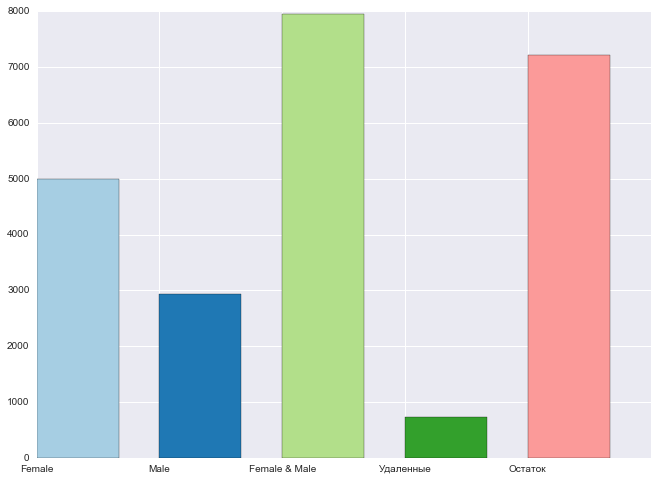

In [11]:
plt_barchart(female, male)

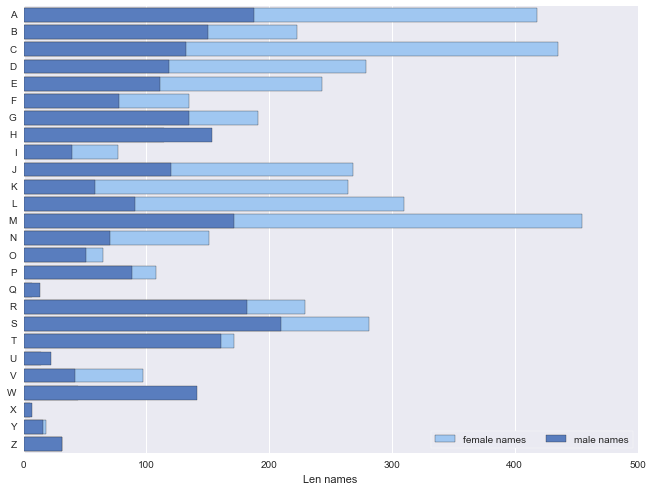

In [12]:
plot_bar(df_names)

#####  Создадим тестовое множество по следующему принципу: 20% от общего количества имен на каждую букву (т.е. 20% от имен на букву А, 20% имен на букву B, и.т.д.).


In [13]:
def create_names_set(names):
    train_names = []
    for l in alf:
        l_names = [name for name, letter in names.items() if letter == l]
        counter_names = int(len(l_names)*0.2)
        print ('For letter "{0:>1}" {1:>3} names; get {2:>3} names for train set'.format(l, len(l_names), counter_names))
        for i in range (counter_names):
            train_names.append(l_names[i])
    print ('Train set size:',len(train_names))
    return train_names

In [14]:
train_names = create_names_set(names_dict)

For letter "A" 606 names; get 121 names for train set
For letter "B" 373 names; get  74 names for train set
For letter "C" 567 names; get 113 names for train set
For letter "D" 397 names; get  79 names for train set
For letter "E" 354 names; get  70 names for train set
For letter "F" 213 names; get  42 names for train set
For letter "G" 326 names; get  65 names for train set
For letter "H" 267 names; get  53 names for train set
For letter "I" 116 names; get  23 names for train set
For letter "J" 388 names; get  77 names for train set
For letter "K" 322 names; get  64 names for train set
For letter "L" 401 names; get  80 names for train set
For letter "M" 626 names; get 125 names for train set
For letter "N" 221 names; get  44 names for train set
For letter "O" 116 names; get  23 names for train set
For letter "P" 196 names; get  39 names for train set
For letter "Q"  20 names; get   4 names for train set
For letter "R" 411 names; get  82 names for train set
For letter "S" 491 names; ge

#### Создадим обучающую и тестовую выборку

In [15]:
df_test_names = df_names.loc[df_names['Name'].isin(train_names)]
df_train_names = df_names.loc[~df_names['Name'].isin(df_test_names['Name'])]

X_train, X_test = df_train_names.Name.str.lower(), df_test_names.Name.str.lower()
y_train, y_test = df_train_names.Sex, df_test_names.Sex

##### Будем классифицировать имена с помощью метода Наивного Байеса, где в качестве признаков будем использовать символьные n-граммы. 

In [16]:
from nltk.util import ngrams
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [17]:
def get_features(data, n):
    features = []
    for name in data:
        for g in list(ngrams(name, n)):
            features.append(g)
    features = list(set(features))
    features.sort()
    return features

In [18]:
def create_train_frame(data, features):
    train_frame = np.zeros((len(data), len(features)), dtype = np.bool)
    for n, name in enumerate(data):
        for f, feature in enumerate(features):
            if "".join(feature) in name:
                train_frame[n][f] = 1
    return train_frame

In [19]:
def fit_gaussian(x_train, y_train, x_test, y_test):
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    prediction = gnb.predict(x_test)
    print("accuracy = {}".format(accuracy_score(y_test, prediction)))
    print("F-score  = {}".format(f1_score(y_test, prediction)))

### n=2

In [20]:
features_n2 = get_features(X_train, 2)
train_n2 = create_train_frame(X_train, features_n2)
test_n2 = create_train_frame(X_test, features_n2)

In [21]:
fit_gaussian(train_n2, y_train, test_n2, y_test)

accuracy = 0.73831123517097
F-score  = 0.4427934621099554


### n=3

In [22]:
features_n3 = get_features(X_train, 3)
train_n3 = create_train_frame(X_train, features_n3)
test_n3 = create_train_frame(X_test, features_n3)

In [23]:
fit_gaussian(train_n3, y_train, test_n3, y_test)

accuracy = 0.801814375436148
F-score  = 0.6330749354005167


### n=4

In [24]:
features_n4 = get_features(X_train, 4)
train_n4 = create_train_frame(X_train, features_n4)
test_n4 = create_train_frame(X_test, features_n4)

In [25]:
fit_gaussian(train_n4, y_train, test_n4, y_test)

accuracy = 0.7787857641311933
F-score  = 0.7245873153779322


Сравнив результаты полученные на моделях, обученных на разных n-граммах, хорошо видно, что этот параметр является очень значимым в решении этой задачи и прямым образом влияет на полученный результат.

В данном случае лучше всего себя показали модели обученные на 3-grams и 4-grams. 

Модель с 3-grams имеет высокий показатель **accuracy** равный 0.80, однако в этой модели **F-score** имеет не самый хороший показатель и равен 0.63. 

Модель с 4-grams, несмотря на то, что **accuracy** = 0.77, имеет более высокий показатель **F-score** = 0.72. 

Исходя из совокупности этих значений, лучшей моделью в этом случае является модель, обученная на 4-grams.

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


### Обучающая выборка для нейронной сети 

In [28]:
m_names = list(df_train_names[df_train_names.Sex == 1].Name)
f_names = list(df_train_names[df_train_names.Sex == 0].Name)

mf_names = []

for f_name in f_names:
    if f_name in m_names:
        mf_names.append(f_name)

m_names = [m_name.lower() for m_name in m_names if not m_name in mf_names]
f_names = [f_name.lower() for f_name in f_names if not f_name in mf_names]


totalEntries = len(m_names) + len(f_names)
maxlen = len(max( m_names , key=len)) + len(max( f_names , key=len))

chars = set(  "".join(m_names) + "".join(f_names)  )
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))


print ("total endtries " , totalEntries)
print ("max len " , maxlen)
print('total chars:', len(chars))

X = np.zeros((totalEntries , maxlen, len(chars) ), dtype=np.bool)
y = np.zeros((totalEntries , 2 ), dtype=np.bool)


for i, name in enumerate(m_names):
    for t, char in enumerate(name):
        X[i, t, char_indices[char]] = 1
    y[i, 0 ] = 1

for i, name in enumerate(f_names):
    for t, char in enumerate(name):
        X[i + len(m_names), t, char_indices[char]] = 1
    y[i + len(m_names) , 1 ] = 1

total endtries  5778
max len  30
total chars: 28


### Тестовая выборка для нейросети

In [29]:
m_names_test = list(df_test_names[df_test_names.Sex == 1].Name)
f_names_test = list(df_test_names[df_test_names.Sex == 0].Name)

mf_names_test = []

for f_name in f_names_test:
    if f_name in m_names_test:
        mf_names_test.append(f_name)

m_names_test = [m_name.lower() for m_name in m_names_test if not m_name in mf_names_test]
f_names_test = [f_name.lower() for f_name in f_names_test if not f_name in mf_names_test]


totalEntries_test = len(m_names_test) + len(f_names_test)
#maxlen = len(max( m_names_test , key=len)) + len(max( f_names_test , key=len))

#chars = set(  "".join(m_names_test) + "".join(f_names_test)  )
#char_indices = dict((c, i) for i, c in enumerate(chars))
#indices_char = dict((i, c) for i, c in enumerate(chars))


print ("total endtries " , totalEntries_test)
print ("max len " , maxlen)
print('total chars:', len(chars))

X_test = np.zeros((totalEntries_test , maxlen, len(chars) ), dtype=np.bool)
y_test = np.zeros((totalEntries_test , 2 ), dtype=np.bool)


for i, name in enumerate(m_names_test):
    for t, char in enumerate(name):
        X_test[i, t, char_indices[char]] = 1
    y_test[i, 0 ] = 1

for i, name in enumerate(f_names_test):
    for t, char in enumerate(name):
        X_test[i + len(m_names_test), t, char_indices[char]] = 1
    y_test[i + len(m_names_test) , 1 ] = 1

total endtries  1433
max len  30
total chars: 28


### Обучение модели

### Узлы 512; Dropout = 0.2

In [30]:
nEpochs = 5

print('Build model...')
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'fmeasure'])

model.fit(X, y, batch_size=16, nb_epoch=nEpochs)
score = model.evaluate(X_test, y_test, batch_size=16)

Build model...
Epoch 1/5
5778/5778 [==============================] - 214s - loss: 0.7175 - acc: 0.5886 - fmeasure: 0.5886   
Epoch 2/5
5778/5778 [==============================] - 210s - loss: 0.6476 - acc: 0.6385 - fmeasure: 0.6385   
Epoch 3/5
5778/5778 [==============================] - 209s - loss: 0.6445 - acc: 0.6431 - fmeasure: 0.6431   
Epoch 4/5
5778/5778 [==============================] - 220s - loss: 0.6376 - acc: 0.6440 - fmeasure: 0.6440   
Epoch 5/5
1433/1433 [==============================] - 13s    


In [31]:
print ("Accuracy: {}".format(score[1]))
print ("F score: {}".format(score[2]))

Accuracy: 0.6734124214933705
F score: 0.6734124175835055


### Узлы 256; Dropout = 0.2

In [34]:
nEpochs = 5

print('Build model...')
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'fmeasure'])

model.fit(X, y, batch_size=16, nb_epoch=nEpochs)
score = model.evaluate(X_test, y_test, batch_size=16)

Build model...
Epoch 1/5
5778/5778 [==============================] - 41s - loss: 0.6906 - acc: 0.5954 - fmeasure: 0.5954    
Epoch 2/5
5778/5778 [==============================] - 38s - loss: 0.6127 - acc: 0.6784 - fmeasure: 0.6784    
Epoch 3/5
5778/5778 [==============================] - 38s - loss: 0.5671 - acc: 0.7127 - fmeasure: 0.7127    
Epoch 4/5
5778/5778 [==============================] - 38s - loss: 0.5330 - acc: 0.7411 - fmeasure: 0.7411    
Epoch 5/5
1433/1433 [==============================] - 3s     


In [35]:
print ("Accuracy: {}".format(score[1]))
print ("F score: {}".format(score[2]))

Accuracy: 0.7613398464759247
F score: 0.7613398180254173


### Узлы 256; Dropout = 0.5

In [36]:
nEpochs = 5

print('Build model...')
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'fmeasure'])

model.fit(X, y, batch_size=16, nb_epoch=nEpochs)
score = model.evaluate(X_test, y_test, batch_size=16)

Build model...
Epoch 1/5
5778/5778 [==============================] - 39s - loss: 0.7000 - acc: 0.5976 - fmeasure: 0.5976    
Epoch 2/5
5778/5778 [==============================] - 37s - loss: 0.6698 - acc: 0.6298 - fmeasure: 0.6298    
Epoch 3/5
5778/5778 [==============================] - 37s - loss: 0.6677 - acc: 0.6326 - fmeasure: 0.6326    
Epoch 4/5
5778/5778 [==============================] - 37s - loss: 0.6554 - acc: 0.6435 - fmeasure: 0.6435    
Epoch 5/5
1424/1433 [============================>.] - ETA: 0s

In [37]:
print ("Accuracy: {}".format(score[1]))
print ("F score: {}".format(score[2]))

Accuracy: 0.653175157034056
F score: 0.6531751420185105


### Узлы 512; Dropout = 0.5

In [38]:
nEpochs = 5

print('Build model...')
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'fmeasure'])

model.fit(X, y, batch_size=16, nb_epoch=nEpochs)
score = model.evaluate(X_test, y_test, batch_size=16)

Build model...
Epoch 1/5
5778/5778 [==============================] - 40s - loss: 0.6976 - acc: 0.5950 - fmeasure: 0.5950    
Epoch 2/5
5778/5778 [==============================] - 37s - loss: 0.6710 - acc: 0.6224 - fmeasure: 0.6224    
Epoch 3/5
5778/5778 [==============================] - 38s - loss: 0.6625 - acc: 0.6272 - fmeasure: 0.6272    
Epoch 4/5
5778/5778 [==============================] - 37s - loss: 0.6487 - acc: 0.6378 - fmeasure: 0.6378    
Epoch 5/5
1433/1433 [==============================] - 3s     


In [39]:
print ("Accuracy: {}".format(score[1]))
print ("F score: {}".format(score[2]))

Accuracy: 0.6782972784368457
F score: 0.678297270117984


### Узлы 256; Dropout = 0.5; Dropout = 0.8

In [40]:
nEpochs = 5

print('Build model...')
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.8))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy', 'fmeasure'])

model.fit(X, y, batch_size=16, nb_epoch=nEpochs)
score = model.evaluate(X_test, y_test, batch_size=16)

Build model...
Epoch 1/5
5778/5778 [==============================] - 41s - loss: 0.7345 - acc: 0.5845 - fmeasure: 0.5845    
Epoch 2/5
5778/5778 [==============================] - 39s - loss: 0.6812 - acc: 0.6172 - fmeasure: 0.6172    
Epoch 3/5
5778/5778 [==============================] - 39s - loss: 0.6746 - acc: 0.6156 - fmeasure: 0.6156    
Epoch 4/5
5778/5778 [==============================] - 39s - loss: 0.6692 - acc: 0.6250 - fmeasure: 0.6250    
Epoch 5/5
1433/1433 [==============================] - 3s     


In [41]:
print ("Accuracy: {}".format(score[1]))
print ("F score: {}".format(score[2]))

Accuracy: 0.6741102581995813
F score: 0.6741102563694317


Сравненив значения метрик **Accuracy** и **F-score** на нейронных сетях, обученных с разным количеством узлов и разными dropout, видно, что лучшие значения показала нейросеть с 256 узлами и Dropout = 0.2

### Сравнение методов

#### Байесовский наивный классификатор обученный на 4-grams:
- **Accuracy:** 0.7787857641311933
- **F-score:** 0.72458731537793222

#### Нейронная сеть с 256 узлами и dropout = 0.2:
- **Accuracy:** 0.7613398464759247
- **F score:** 0.76133981802541732

Нейронные сети показывают более сбалансированные значения по метрикам **Accuracy** и **F-score**, они практически не отличаются друг от друга. Тогда как при классификации методом наивного Байеса практически при всех n-grams, эти показатели имели довольно сильное расхождение.

В данном случае оба метода классификации показали приблизительно одинаковый результат. Одноко, чуть лучше оказалась нейронная сеть, за счет более высокого показателя по **F-score** и общей сбалансированности по метрикам

Возможно, что от этой нейронной сети можно добиться еще более высоких результатов, если верно подобрать количество узлов и значения dropout. Так как нейронные сети LSTM являются одним из лучших методов, за счет того, что в них присутствуют реккурентные связи.